In [5]:
import math
import numpy as np
import numpy.random as npr
from pylab import plt, mpl

In [7]:
plt.style.use('fast')
mpl.rcParams['font.family'] = 'serif'

In [9]:
npr.seed(100)
np.set_printoptions(precision=4)

In [11]:
npr.rand(10)

array([0.5434, 0.2784, 0.4245, 0.8448, 0.0047, 0.1216, 0.6707, 0.8259,
       0.1367, 0.5751])

In [13]:
npr.rand(5, 5)

array([[0.8913, 0.2092, 0.1853, 0.1084, 0.2197],
       [0.9786, 0.8117, 0.1719, 0.8162, 0.2741],
       [0.4317, 0.94  , 0.8176, 0.3361, 0.1754],
       [0.3728, 0.0057, 0.2524, 0.7957, 0.0153],
       [0.5988, 0.6038, 0.1051, 0.3819, 0.0365]])

In [15]:
a = 5.
b = 10.
npr.rand(10) * (b - a) + a

array([9.4521, 9.9046, 5.2997, 9.4527, 7.8845, 8.7124, 8.1509, 7.9092,
       5.1022, 6.0501])

In [17]:
npr.rand(5, 5) * (b - a) + a

array([[7.7234, 8.8456, 6.2535, 6.4295, 9.262 ],
       [9.875 , 9.4243, 6.7975, 7.9943, 6.774 ],
       [6.701 , 5.8904, 6.1885, 5.2243, 7.5272],
       [6.8813, 7.964 , 8.1497, 5.713 , 9.6692],
       [9.7319, 8.0115, 6.9388, 6.8159, 6.0217]])

In [19]:
sample_size = 500
rn1 = npr.rand(sample_size, 3)
rn2 = npr.randint(0, 10, sample_size)
rn3 = npr.sample(size=sample_size)
a = [0, 25, 50, 75, 100]
rn4 = npr.choice(a, size=sample_size)

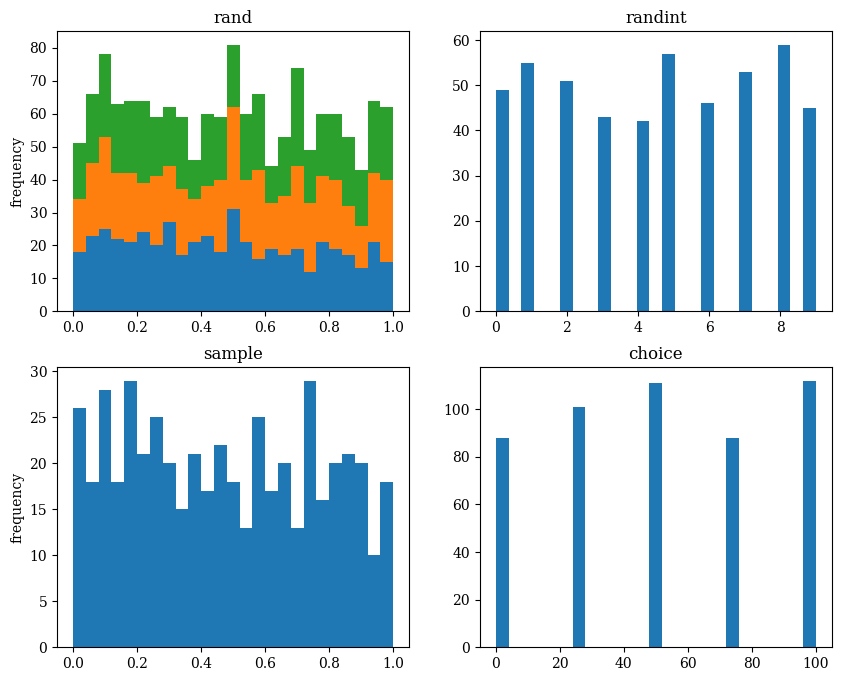

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                             figsize=(10, 8))
ax1.hist(rn1, bins=25, stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('randint')
ax3.hist(rn3, bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('choice');

In [23]:
sample_size = 500
rn1 = npr.standard_normal(sample_size)
rn2 = npr.normal(100, 20, sample_size)
rn3 = npr.chisquare(df=0.5, size=sample_size)
rn4 = npr.poisson(lam=1.0, size=sample_size)

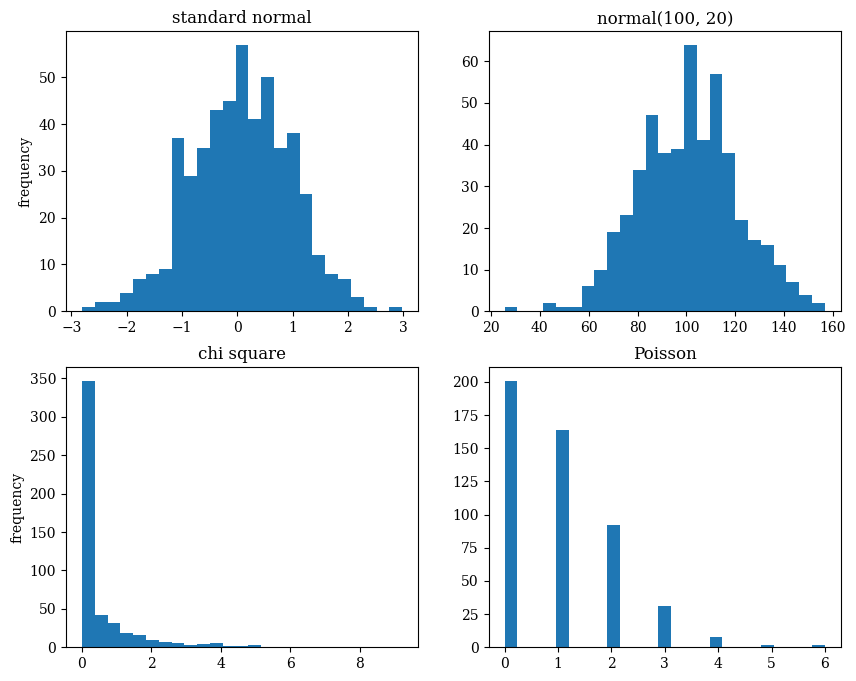

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                             figsize=(10, 8))
ax1.hist(rn1, bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')
ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('Poisson');

In [27]:
S0 = 100
r = .05
sigma = .25
T = 2.0
I = 10000
ST1 = S0 * np.exp((r - .5 * sigma ** 2) * T +
                  sigma * math.sqrt(T) * npr.standard_normal(I))

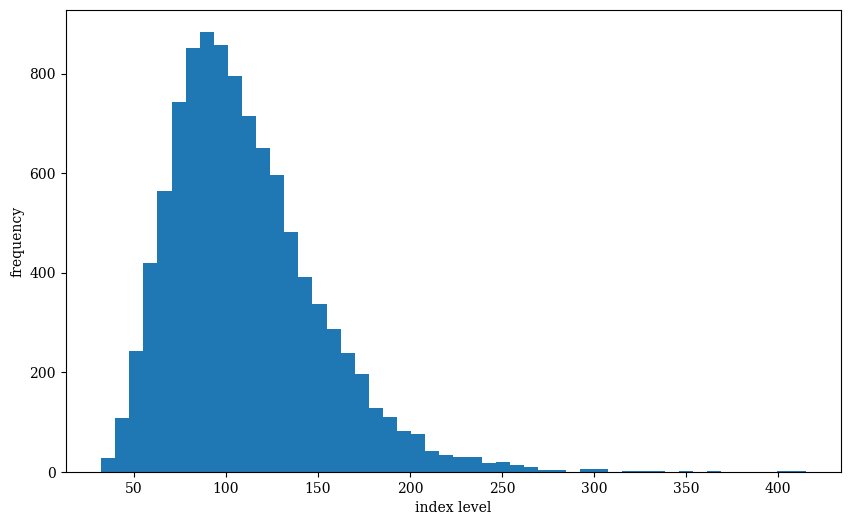

In [29]:
plt.figure(figsize=(10,6))
plt.hist(ST1, bins = 50)
plt.xlabel('index level')
plt.ylabel('frequency');

In [31]:
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T,
                         sigma * math.sqrt(T), size = I)

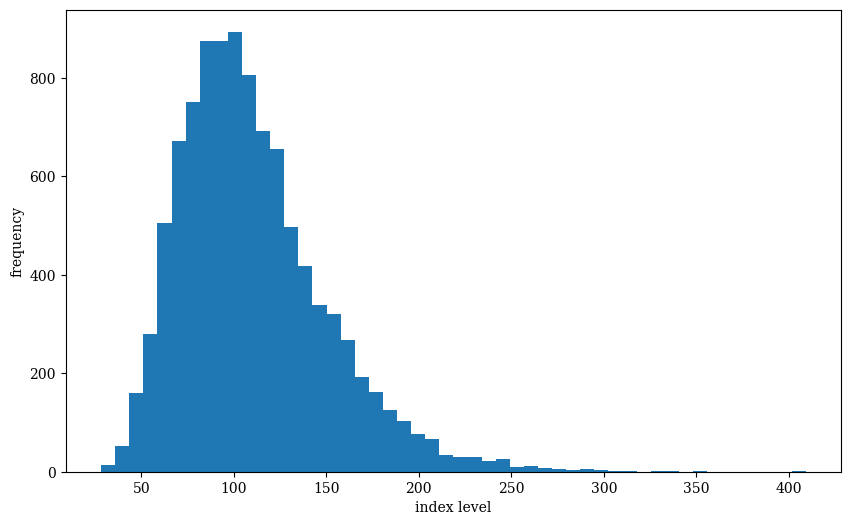

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

In [90]:
ST2 = S0 * npr.lognormal((r - .5 * sigma **2) * T,
                           sigma * math.sqrt(T), size=I)

Text(0, 0.5, 'frequency')

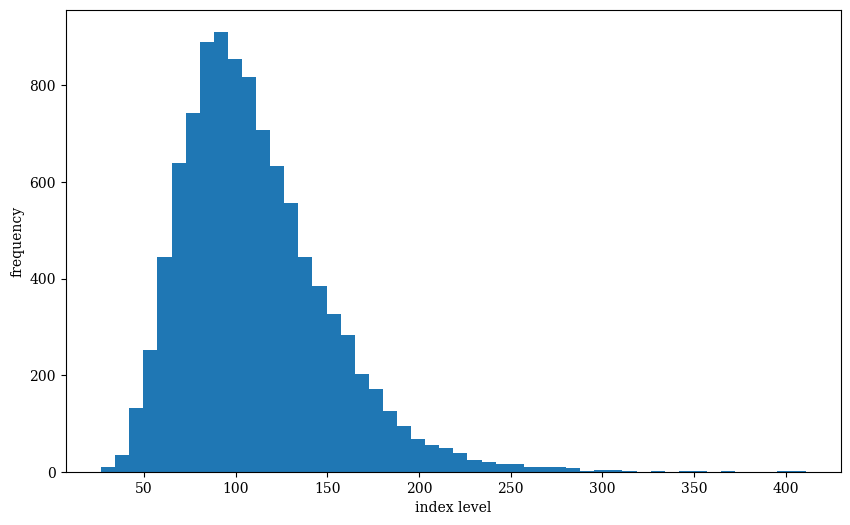

In [92]:
plt.figure(figsize=(10,6))
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

In [94]:
import scipy.stats as scs

In [100]:
def print_statistics(a1, a2):
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print('%14s %14s %14s' %
          ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]),
                                  np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))

In [102]:
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         32.327         26.552
           max        414.825        410.979
          mean        110.730        111.010
           std         40.300         40.287
          skew          1.122          1.201
      kurtosis          2.438          2.911


In [124]:
I = 10000
M = 50
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                             sigma * math.sqrt(dt) * npr.standard_normal(I))

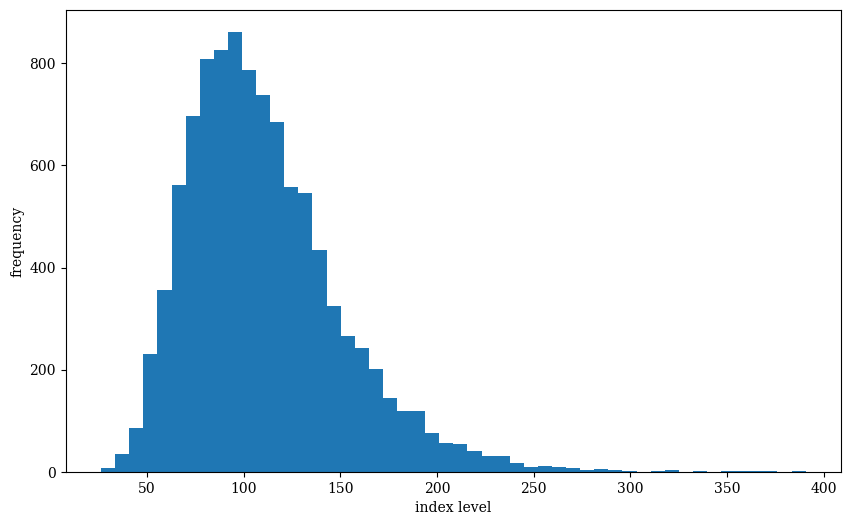

In [126]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

In [136]:
print_statistics(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         26.308         26.552
           max        390.749        410.979
          mean        110.632        111.010
           std         39.769         40.287
          skew          1.126          1.201
      kurtosis          2.310          2.911


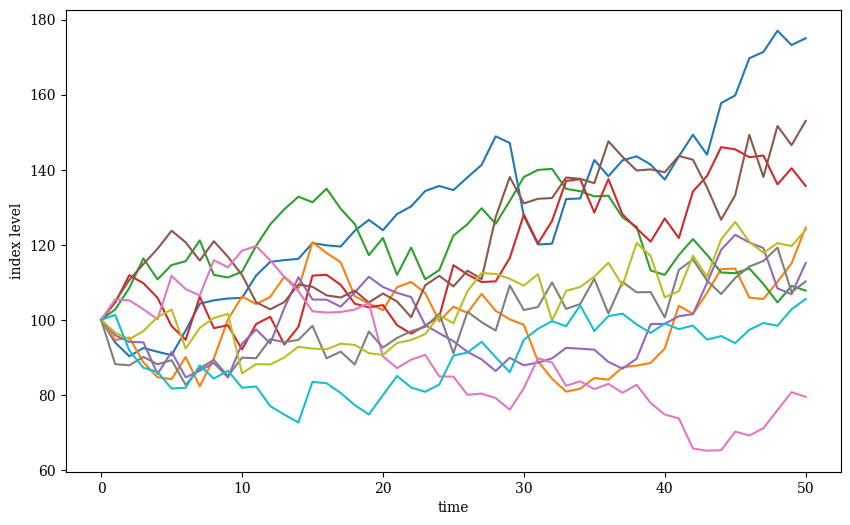

In [138]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');